<a href="https://colab.research.google.com/github/versusic/My-portfolio/blob/main/1_MNIST_classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification using CNN architecture:

# 1. Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.datasets import MNIST

from torch.utils.data import DataLoader
from torch.utils.data import random_split

# 2. Installing MNIST dataset and spliting it:

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

train_dataset = MNIST(root = 'data/', train=True, download=True, transform=transform)
test_dataset = MNIST(root = 'data/', train=False, download=True, transform=transform)

In [ ]:
print("length of Train Datasets: ", len(train_dataset))
print("length of Validation Datasets: ", len(test_dataset))

length of Train Datasets:  60000
length of Validation Datasets:  10000


In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size, shuffle = False)

# 3. Showing a batch of data:

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([64, 1, 28, 28])
torch.Size([64])


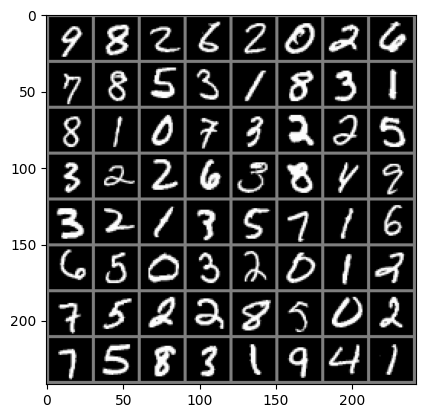

In [ ]:
# get some random training images
dataiter = iter(train_loader)
for i, j in dataiter:
    print(i.shape)
    print(j.shape)
    break
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# 4. Defining the model:

In [ ]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = CNN_model()

In [ ]:
print(model)

CNN_model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

# 5. Training the model and testing it:

In [ ]:
len(train_loader)

938

In [ ]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(f'epoch [{epoch + 1}] loss: {running_loss/len(train_loader):.3f}')

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

print('Finished Training')

epoch [1] loss: 0.360
Accuracy of the network on the 10000 test images: 96.92 %
epoch [2] loss: 0.089
Accuracy of the network on the 10000 test images: 97.99 %
epoch [3] loss: 0.062
Accuracy of the network on the 10000 test images: 98.61 %
epoch [4] loss: 0.050
Accuracy of the network on the 10000 test images: 98.67 %
epoch [5] loss: 0.041
Accuracy of the network on the 10000 test images: 98.75 %
epoch [6] loss: 0.035
Accuracy of the network on the 10000 test images: 98.84 %
epoch [7] loss: 0.029
Accuracy of the network on the 10000 test images: 98.86 %
epoch [8] loss: 0.026
Accuracy of the network on the 10000 test images: 98.83 %
epoch [9] loss: 0.023
Accuracy of the network on the 10000 test images: 98.67 %
epoch [10] loss: 0.020
Accuracy of the network on the 10000 test images: 99.07 %
Finished Training


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
accuracy_lst = []
classnames_lst = []
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    accuracy_lst.append(accuracy)
    classnames_lst.append(classname)
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.6 %
Accuracy for class: 1     is 99.6 %
Accuracy for class: 2     is 99.2 %
Accuracy for class: 3     is 98.9 %
Accuracy for class: 4     is 99.5 %
Accuracy for class: 5     is 99.4 %
Accuracy for class: 6     is 98.5 %
Accuracy for class: 7     is 99.4 %
Accuracy for class: 8     is 98.9 %
Accuracy for class: 9     is 97.5 %


# 6. Visualizing results

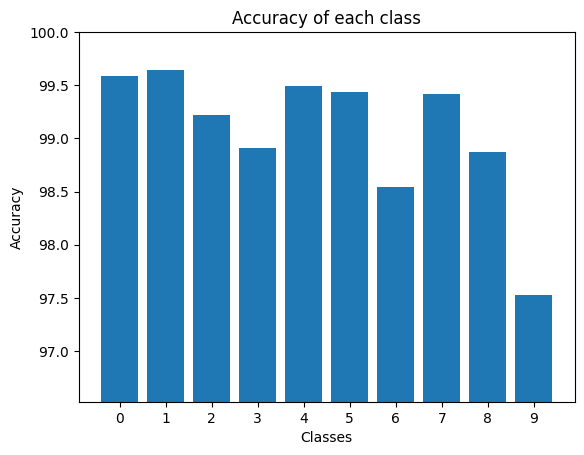

In [ ]:
plt.bar(classnames_lst, accuracy_lst)
plt.title("Accuracy of each class")
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.ylim(min(accuracy_lst)-1, 100)
plt.show()